In [1]:
!pip install mean_average_precision
!git clone https://github.com/facebookresearch/detectron2.git --branch v0.1.1 detectron2_v0.1.1
%cd detectron2_v0.1.1
!git checkout db1614e
!pip install -e .

  Created wheel for mean-average-precision: filename=mean_average_precision-0.0.2.1-cp37-none-any.whl size=8233 sha256=4b305f2a033c94e434342f412de82b1df66db7512bbf6b01d36992607794d34a
  Stored in directory: /root/.cache/pip/wheels/e6/45/dd/242ba9bcb0b34a4fcd3c6239ce4f219a341de555e9b25e2a1f
Successfully built mean-average-precision
Cloning into 'detectron2_v0.1.1'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 11607 (delta 120), reused 242 (delta 109), pack-reused 11337
Receiving objects: 100% (11607/11607), 4.74 MiB | 19.02 MiB/s, done.
Resolving deltas: 100% (8398/8398), done.
Note: checking out '401fd04cecec16f1ed0452eb936502d5d33a23be'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a n

In [2]:
!unzip HW4_q3.zip
%cd HW4_q3
!wget https://public.vinai.io/ContactHands.zip
!unzip ContactHands

Streaming output truncated to the last 5000 lines.
  inflating: ContactHands/JPEGImages/train_2607_000000464736.jpg  
  inflating: ContactHands/JPEGImages/train_0721_000000045492.jpg  
  inflating: ContactHands/JPEGImages/test_4698_6.jpg  
  inflating: ContactHands/JPEGImages/train_3187_Buffy_167.jpg  
  inflating: ContactHands/JPEGImages/train_3678_athletics_00224.jpg  
  inflating: ContactHands/JPEGImages/train_1420_000000187785.jpg  
  inflating: ContactHands/JPEGImages/train_2173_000000364154.jpg  
  inflating: ContactHands/JPEGImages/train_0501_000000009429.jpg  
  inflating: ContactHands/JPEGImages/train_1119_000000118181.jpg  
  inflating: ContactHands/JPEGImages/train_0385_064393_004.jpg  
  inflating: ContactHands/JPEGImages/train_1875_000000296459.jpg  
  inflating: ContactHands/JPEGImages/train_0159_029167_004.jpg  
  inflating: ContactHands/JPEGImages/train_3195_Buffy_236.jpg  
  inflating: ContactHands/JPEGImages/train_3294_Poselet_129.jpg  
  inflating: ContactHands/JPEGI

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd ../

/content/detectron2_v0.1.1


In [4]:
import detectron2
detectron2.__version__

'0.1.1'

In [5]:
cd HW4_q3/

/content/detectron2_v0.1.1/HW4_q3


In [6]:
cp -r ../HW4_q3/sets/* ContactHands/ImageSets/Main/

In [7]:
!rm -rf ContactHands/Annotations/
!cp -rf ../HW4_q3/Annotations/ ContactHands/

In [8]:
ls

Annotations/  ContactHands/     detect.py     maskrcnn/     result.npy
configs/      ContactHands.zip  hw4_utils.py  __pycache__/  sets/


In [9]:
from hw4_utils import *
from sklearn import svm
from numpy import linalg as LA
feat_extractor = prepare_second_stream()
D_train, lb_train = get_pos_and_random_neg(feat_extractor, 'train')
clf = svm.LinearSVC(max_iter=1000)
clf.fit(D_train, lb_train)


model_final_f10217.pkl: 178MB [00:14, 12.6MB/s]                           
100%|██████████| 5000/5000 [06:01<00:00, 13.82it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
generate_result_file(feat_extractor, clf, dataset="validation")
ap = compute_mAP(dataset="validation")
print(ap)



100%|██████████| 1000/1000 [14:12<00:00,  1.17it/s]

  2%|▏         | 19/1000 [00:00<00:08, 116.17it/s]

Results have been saved to result.npy
Loading annotations and predictions



100%|██████████| 1000/1000 [00:45<00:00, 21.85it/s]


mAP: 0.00010264436423312873
0.000102644364



100%|██████████| 1000/1000 [00:50<00:00, 19.76it/s]


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.63')

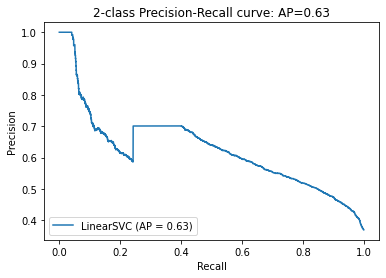

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
D_val, lb_val = get_pos_and_random_neg(feat_extractor,'validation')
y_score = clf.decision_function(D_val)

average_precision = average_precision_score(lb_val, y_score)

disp = plot_precision_recall_curve(clf, D_val, lb_val)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [9]:
from hw4_utils import *
from sklearn import svm
from numpy import linalg as LA
from sklearn.metrics import average_precision_score
feat_extractor = prepare_second_stream()
D_train, lb_train = get_pos_and_random_neg(feat_extractor, 'train')


#sorting back to negative and positive samples
ind = np.argsort(lb_train)
D_train = D_train[ind]
lb_train = lb_train[ind]
clf = svm.LinearSVC(max_iter=1000)
clf.fit(D_train, lb_train)

#splitting
splitter = 0
for i in range(1, len(lb_train)):
  if lb_train[i-1]!=lb_train[i]:
  	splitter = i
  	break
negD = D_train[:splitter]
posD = D_train[splitter:]


100%|██████████| 5000/5000 [05:41<00:00, 14.65it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:

d_values = []
aps = []
D_val, lb_val = get_pos_and_random_neg(feat_extractor,'validation', num_neg_per_img=10)
itr=10
for i in range(0,itr):
  #get support vectors in negD
  print(negD.shape)
  dec_function = clf.decision_function(negD)
  sup_ind = np.where(np.abs(dec_function) <= 1 + 1e-15)[0]
  
  # print(lb_train)
  # print(lb_train[sup_ind])
  # print(len(lb_train))
  # print(len(lb_train[sup_ind]))
  negD = negD[sup_ind]

  #get hardest -ve samples
  num_img = 100
  dataset_file = DATA_DIR + "/ImageSets/Main/{}.txt".format("train")
  with open(dataset_file, "r") as f:
      dataset = f.read().splitlines()
  dataset = random.sample(dataset, 100)
  rects = {}
  hard_D = None
  for img_name in tqdm.tqdm(dataset):
    img_path = os.path.join(images_pool, img_name + ".jpg")
    if os.path.exists(img_path):
      img = cv2.imread(img_path)
      old_h, old_w = img.shape[0], img.shape[1]
      img = cv2.resize(img, (image_size[0], image_size[1]))
      rects = detect(img, feat_extractor, clf)
      
      #filter the rects for overlaps
      xml_path = os.path.join(annotations_pool, img_name + ".xml")
      _, boxes = read_content(xml_path)
  
      for box in boxes:
        ious = get_iou(box, rects)
        rects = rects[ious<0.3]

      #got the rects now get the features
      inference_second_stream(feat_extractor, img)
      feats = feat_extractor.extract_features(rects[:100,:4])
      feats = feats.detach().to('cpu').numpy()
      print("Done")
      if hard_D is None:
          hard_D = feats
      else:
          hard_D = np.concatenate((hard_D, feats), axis=0)
      
      print(hard_D.shape)
      

  print(posD.shape)
  print(negD.shape)
  #union negD and hardNeg
  negD = np.concatenate((negD, hard_D), axis=0)
  negD = np.unique(negD, axis=0)
  print(posD.shape)
  print(negD.shape)
  D_train = np.concatenate((posD, negD), axis=0)
  lb_train = np.concatenate((np.ones(posD.shape[0]), -np.ones(negD.shape[0])), axis=0)
  clf = svm.LinearSVC(max_iter=1000)
  clf.fit(D_train, lb_train)

  #get the objective function values
  dec_function_all = clf.decision_function(D_train)
  sup_ind_all = np.where(np.abs(dec_function_all) <= 1 + 1e-15)[0]
  dec_function_all = dec_function_all[sup_ind_all]
  d_values.append((0.5)*LA.norm(clf.coef_)*LA.norm(clf.coef_) + ( dec_function_all.shape[0] - np.sum(np.abs(dec_function_all)) ) )
  
  y_score = clf.decision_function(D_val)
  aps.append(average_precision_score(lb_val, y_score))
  #
  
# print(lb_train)

  0%|          | 0/100 [00:00<?, ?it/s]

(14003, 1024)


  1%|          | 1/100 [00:00<01:20,  1.23it/s]

Done
(100, 1024)


  2%|▏         | 2/100 [00:01<01:19,  1.23it/s]

Done
(200, 1024)


  3%|▎         | 3/100 [00:02<01:18,  1.23it/s]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:18,  1.23it/s]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:15,  1.25it/s]

Done
(500, 1024)


  6%|▌         | 6/100 [00:04<01:15,  1.25it/s]

Done
(600, 1024)


  7%|▋         | 7/100 [00:05<01:13,  1.26it/s]

Done
(700, 1024)


  8%|▊         | 8/100 [00:06<01:13,  1.26it/s]

Done
(800, 1024)


  9%|▉         | 9/100 [00:07<01:12,  1.25it/s]

Done
(900, 1024)


 10%|█         | 10/100 [00:08<01:12,  1.25it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:08<01:11,  1.25it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:09<01:11,  1.24it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:10<01:10,  1.24it/s]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:11<01:08,  1.25it/s]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:12<01:08,  1.25it/s]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:12<01:08,  1.22it/s]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:13<01:07,  1.24it/s]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:14<01:06,  1.23it/s]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:15<01:05,  1.23it/s]

Done
(1900, 1024)


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Done
(2000, 1024)


 21%|██        | 21/100 [00:16<01:04,  1.22it/s]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:17<01:03,  1.24it/s]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:18<01:02,  1.23it/s]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:19<01:01,  1.23it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:20<01:01,  1.23it/s]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:21<01:00,  1.22it/s]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:21<00:59,  1.24it/s]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:22<00:58,  1.24it/s]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:23<00:57,  1.23it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:24<00:56,  1.24it/s]

Done
(3000, 1024)


 31%|███       | 31/100 [00:25<00:55,  1.24it/s]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:25<00:54,  1.25it/s]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:26<00:54,  1.23it/s]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:27<00:53,  1.24it/s]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:28<00:52,  1.23it/s]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:29<00:52,  1.22it/s]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:29<00:51,  1.23it/s]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:30<00:50,  1.23it/s]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:31<00:49,  1.24it/s]

Done
(3900, 1024)


 40%|████      | 40/100 [00:32<00:48,  1.25it/s]

Done
(4000, 1024)


 41%|████      | 41/100 [00:33<00:47,  1.24it/s]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:33<00:46,  1.24it/s]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:34<00:46,  1.22it/s]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:35<00:45,  1.23it/s]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:36<00:44,  1.23it/s]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:37<00:43,  1.24it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:38<00:42,  1.24it/s]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:38<00:41,  1.24it/s]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:39<00:41,  1.24it/s]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:40<00:40,  1.23it/s]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:41<00:39,  1.24it/s]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:42<00:39,  1.23it/s]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:42<00:38,  1.23it/s]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:43<00:37,  1.24it/s]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:44<00:36,  1.24it/s]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:45<00:35,  1.26it/s]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:46<00:34,  1.25it/s]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:46<00:33,  1.24it/s]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:47<00:32,  1.24it/s]

Done
(5900, 1024)


 60%|██████    | 60/100 [00:48<00:32,  1.25it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [00:49<00:31,  1.24it/s]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [00:50<00:30,  1.24it/s]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [00:50<00:29,  1.24it/s]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [00:51<00:29,  1.24it/s]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [00:52<00:27,  1.25it/s]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [00:53<00:26,  1.26it/s]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [00:54<00:26,  1.25it/s]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [00:54<00:25,  1.25it/s]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [00:55<00:24,  1.26it/s]

Done
(6900, 1024)


 70%|███████   | 70/100 [00:56<00:24,  1.23it/s]

Done
(7000, 1024)


 71%|███████   | 71/100 [00:57<00:23,  1.23it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [00:58<00:22,  1.23it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [00:58<00:21,  1.24it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [00:59<00:20,  1.25it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:00<00:19,  1.26it/s]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:01<00:18,  1.26it/s]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:02<00:18,  1.26it/s]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:02<00:17,  1.25it/s]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:03<00:16,  1.26it/s]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:04<00:16,  1.24it/s]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:05<00:15,  1.26it/s]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:06<00:14,  1.24it/s]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:06<00:13,  1.24it/s]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:07<00:12,  1.24it/s]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:08<00:12,  1.24it/s]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:09<00:11,  1.25it/s]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:10<00:10,  1.24it/s]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:10<00:09,  1.24it/s]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:11<00:08,  1.25it/s]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:12<00:08,  1.24it/s]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:13<00:07,  1.24it/s]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:14<00:06,  1.25it/s]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:14<00:05,  1.27it/s]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:15<00:04,  1.26it/s]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:16<00:03,  1.26it/s]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:17<00:03,  1.26it/s]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:18<00:02,  1.26it/s]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:18<00:01,  1.26it/s]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:19<00:00,  1.26it/s]

Done
(9900, 1024)


100%|██████████| 100/100 [01:20<00:00,  1.24it/s]

Done
(10000, 1024)
(13854, 1024)
(1984, 1024)
(13854, 1024)
(11979, 1024)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(11979, 1024)


  1%|          | 1/100 [00:01<01:58,  1.20s/it]

Done
(100, 1024)


  2%|▏         | 2/100 [00:02<01:53,  1.16s/it]

Done
(200, 1024)


  3%|▎         | 3/100 [00:03<01:52,  1.16s/it]

Done
(300, 1024)


  4%|▍         | 4/100 [00:04<01:48,  1.13s/it]

Done
(400, 1024)


  5%|▌         | 5/100 [00:05<01:46,  1.13s/it]

Done
(500, 1024)


  6%|▌         | 6/100 [00:06<01:46,  1.13s/it]

Done
(600, 1024)


  7%|▋         | 7/100 [00:07<01:45,  1.14s/it]

Done
(700, 1024)


  8%|▊         | 8/100 [00:09<01:43,  1.13s/it]

Done
(800, 1024)


  9%|▉         | 9/100 [00:10<01:43,  1.14s/it]

Done
(900, 1024)


 10%|█         | 10/100 [00:11<01:42,  1.14s/it]

Done
(1000, 1024)


 11%|█         | 11/100 [00:12<01:41,  1.14s/it]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:13<01:39,  1.13s/it]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:14<01:39,  1.14s/it]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:15<01:38,  1.15s/it]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:16<01:36,  1.13s/it]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:18<01:33,  1.12s/it]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:19<01:34,  1.13s/it]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:20<01:33,  1.14s/it]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:21<01:33,  1.15s/it]

Done
(1900, 1024)


 20%|██        | 20/100 [00:22<01:33,  1.16s/it]

Done
(2000, 1024)


 21%|██        | 21/100 [00:23<01:33,  1.18s/it]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:25<01:31,  1.17s/it]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:26<01:28,  1.15s/it]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:27<01:26,  1.14s/it]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:28<01:26,  1.15s/it]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:29<01:24,  1.15s/it]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:30<01:23,  1.14s/it]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:31<01:21,  1.14s/it]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:33<01:21,  1.15s/it]

Done
(2900, 1024)


 30%|███       | 30/100 [00:34<01:21,  1.16s/it]

Done
(3000, 1024)


 31%|███       | 31/100 [00:35<01:21,  1.17s/it]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:36<01:19,  1.17s/it]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:37<01:18,  1.18s/it]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:38<01:16,  1.17s/it]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:40<01:14,  1.15s/it]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:41<01:13,  1.15s/it]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:42<01:11,  1.14s/it]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:43<01:11,  1.15s/it]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:44<01:10,  1.16s/it]

Done
(3900, 1024)


 40%|████      | 40/100 [00:45<01:09,  1.17s/it]

Done
(4000, 1024)


 41%|████      | 41/100 [00:46<01:07,  1.14s/it]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:48<01:06,  1.14s/it]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:49<01:05,  1.15s/it]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:50<01:03,  1.13s/it]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:51<01:02,  1.14s/it]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:52<01:03,  1.17s/it]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:53<01:01,  1.16s/it]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:55<01:00,  1.16s/it]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:56<00:58,  1.15s/it]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:57<00:57,  1.15s/it]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:58<00:56,  1.15s/it]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:59<00:54,  1.14s/it]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [01:00<00:53,  1.14s/it]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [01:01<00:53,  1.15s/it]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [01:03<00:52,  1.17s/it]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [01:04<00:50,  1.15s/it]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [01:05<00:49,  1.16s/it]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [01:06<00:47,  1.14s/it]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [01:07<00:46,  1.14s/it]

Done
(5900, 1024)


 60%|██████    | 60/100 [01:08<00:45,  1.14s/it]

Done
(6000, 1024)


 61%|██████    | 61/100 [01:09<00:44,  1.15s/it]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [01:11<00:43,  1.15s/it]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [01:12<00:43,  1.17s/it]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [01:13<00:41,  1.15s/it]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:14<00:40,  1.15s/it]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:15<00:39,  1.15s/it]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:16<00:37,  1.14s/it]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:18<00:36,  1.15s/it]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:19<00:35,  1.15s/it]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:20<00:34,  1.14s/it]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:21<00:32,  1.13s/it]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:22<00:31,  1.13s/it]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:23<00:30,  1.14s/it]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:24<00:29,  1.15s/it]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:25<00:28,  1.14s/it]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:27<00:27,  1.15s/it]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:28<00:26,  1.15s/it]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:29<00:25,  1.16s/it]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:30<00:24,  1.15s/it]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:31<00:23,  1.16s/it]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:32<00:21,  1.15s/it]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:34<00:20,  1.16s/it]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:35<00:19,  1.17s/it]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:36<00:18,  1.17s/it]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:37<00:17,  1.17s/it]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:38<00:16,  1.16s/it]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:39<00:15,  1.17s/it]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:41<00:14,  1.17s/it]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:42<00:12,  1.16s/it]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:43<00:11,  1.16s/it]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:44<00:10,  1.16s/it]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:45<00:09,  1.18s/it]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:47<00:08,  1.20s/it]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:48<00:06,  1.16s/it]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:49<00:05,  1.16s/it]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:50<00:04,  1.15s/it]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:51<00:03,  1.16s/it]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:52<00:02,  1.16s/it]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:53<00:01,  1.15s/it]

Done
(9900, 1024)


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]

Done
(10000, 1024)
(13854, 1024)
(7638, 1024)


(13854, 1024)
(17638, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(17638, 1024)


  1%|          | 1/100 [00:01<01:43,  1.05s/it]

Done
(100, 1024)


  2%|▏         | 2/100 [00:02<01:40,  1.03s/it]

Done
(200, 1024)


  3%|▎         | 3/100 [00:03<01:40,  1.03s/it]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:36,  1.00s/it]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:32,  1.03it/s]

Done
(500, 1024)


  6%|▌         | 6/100 [00:05<01:33,  1.00it/s]

Done
(600, 1024)


  7%|▋         | 7/100 [00:06<01:33,  1.01s/it]

Done
(700, 1024)


  8%|▊         | 8/100 [00:07<01:30,  1.02it/s]

Done
(800, 1024)


  9%|▉         | 9/100 [00:08<01:28,  1.03it/s]

Done
(900, 1024)


 10%|█         | 10/100 [00:09<01:26,  1.04it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:10<01:26,  1.03it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:11<01:26,  1.02it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:12<01:27,  1.01s/it]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:13<01:27,  1.02s/it]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:14<01:26,  1.02s/it]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:15<01:23,  1.00it/s]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:16<01:22,  1.00it/s]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:17<01:23,  1.01s/it]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:18<01:22,  1.02s/it]

Done
(1900, 1024)


 20%|██        | 20/100 [00:20<01:22,  1.03s/it]

Done
(2000, 1024)


 21%|██        | 21/100 [00:21<01:22,  1.04s/it]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:22<01:21,  1.05s/it]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:23<01:21,  1.06s/it]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:24<01:17,  1.01s/it]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:25<01:15,  1.01s/it]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:26<01:14,  1.00s/it]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:27<01:11,  1.02it/s]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:28<01:10,  1.03it/s]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:29<01:09,  1.02it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:30<01:08,  1.02it/s]

Done
(3000, 1024)


 31%|███       | 31/100 [00:31<01:09,  1.00s/it]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:32<01:08,  1.00s/it]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:33<01:08,  1.01s/it]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:34<01:06,  1.01s/it]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:35<01:04,  1.00it/s]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:36<01:03,  1.01it/s]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:37<01:03,  1.00s/it]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:38<01:02,  1.00s/it]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:39<01:02,  1.02s/it]

Done
(3900, 1024)


 40%|████      | 40/100 [00:40<01:01,  1.02s/it]

Done
(4000, 1024)


 41%|████      | 41/100 [00:41<01:00,  1.03s/it]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:42<00:58,  1.00s/it]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:43<00:57,  1.01s/it]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:44<00:56,  1.01s/it]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:45<00:55,  1.00s/it]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:46<00:53,  1.01it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:47<00:53,  1.00s/it]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:48<00:52,  1.02s/it]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:49<00:52,  1.02s/it]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:50<00:50,  1.01s/it]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:51<00:49,  1.00s/it]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:52<00:48,  1.01s/it]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:53<00:47,  1.01s/it]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:54<00:44,  1.02it/s]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:55<00:44,  1.02it/s]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:56<00:43,  1.01it/s]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:57<00:44,  1.02s/it]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:58<00:40,  1.03it/s]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:59<00:39,  1.03it/s]

Done
(5900, 1024)


 60%|██████    | 60/100 [01:00<00:38,  1.04it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [01:01<00:38,  1.02it/s]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [01:02<00:37,  1.01it/s]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [01:03<00:36,  1.00it/s]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [01:04<00:36,  1.01s/it]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:05<00:35,  1.02s/it]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:06<00:34,  1.02s/it]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:07<00:33,  1.02s/it]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:08<00:33,  1.03s/it]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:09<00:31,  1.02s/it]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:10<00:30,  1.01s/it]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:11<00:29,  1.01s/it]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:12<00:27,  1.01it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:13<00:26,  1.02it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:14<00:25,  1.03it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:15<00:24,  1.02it/s]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:16<00:24,  1.01s/it]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:17<00:23,  1.01s/it]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:18<00:22,  1.01s/it]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:19<00:21,  1.01s/it]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:20<00:20,  1.01s/it]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:21<00:18,  1.00it/s]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:22<00:18,  1.01s/it]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:23<00:17,  1.02s/it]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:24<00:16,  1.02s/it]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:25<00:15,  1.02s/it]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:26<00:14,  1.04s/it]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:27<00:13,  1.04s/it]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:28<00:12,  1.04s/it]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:29<00:11,  1.03s/it]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:30<00:10,  1.01s/it]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:31<00:09,  1.00s/it]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:32<00:08,  1.02s/it]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:33<00:07,  1.03s/it]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:34<00:05,  1.00it/s]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:35<00:05,  1.01s/it]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:36<00:04,  1.01s/it]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:37<00:03,  1.03s/it]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:38<00:02,  1.02s/it]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:39<00:01,  1.01s/it]

Done
(9900, 1024)


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]

Done
(10000, 1024)
(13854, 1024)
(2115, 1024)


(13854, 1024)
(12093, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(12093, 1024)


  1%|          | 1/100 [00:00<01:30,  1.09it/s]

Done
(100, 1024)


  2%|▏         | 2/100 [00:01<01:26,  1.13it/s]

Done
(200, 1024)


  3%|▎         | 3/100 [00:02<01:26,  1.13it/s]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:24,  1.14it/s]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:21,  1.16it/s]

Done
(500, 1024)


  6%|▌         | 6/100 [00:05<01:19,  1.19it/s]

Done
(600, 1024)


  7%|▋         | 7/100 [00:05<01:18,  1.19it/s]

Done
(700, 1024)


  8%|▊         | 8/100 [00:06<01:17,  1.19it/s]

Done
(800, 1024)


  9%|▉         | 9/100 [00:07<01:16,  1.20it/s]

Done
(900, 1024)


 10%|█         | 10/100 [00:08<01:16,  1.17it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:09<01:15,  1.17it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:10<01:14,  1.18it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:10<01:12,  1.19it/s]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:11<01:12,  1.18it/s]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:12<01:12,  1.17it/s]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:13<01:11,  1.17it/s]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:14<01:10,  1.18it/s]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:15<01:08,  1.19it/s]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:16<01:07,  1.20it/s]

Done
(1900, 1024)


 20%|██        | 20/100 [00:16<01:06,  1.19it/s]

Done
(2000, 1024)


 21%|██        | 21/100 [00:17<01:05,  1.20it/s]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:18<01:04,  1.20it/s]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:19<01:03,  1.21it/s]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:20<01:05,  1.17it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:21<01:03,  1.17it/s]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:22<01:03,  1.17it/s]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:22<01:02,  1.17it/s]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:23<01:01,  1.17it/s]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:24<01:00,  1.18it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:25<00:59,  1.17it/s]

Done
(3000, 1024)


 31%|███       | 31/100 [00:26<00:59,  1.17it/s]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:27<00:57,  1.18it/s]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:27<00:56,  1.18it/s]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:28<00:55,  1.18it/s]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:29<00:55,  1.17it/s]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:30<00:54,  1.17it/s]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:31<00:53,  1.17it/s]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:32<00:52,  1.18it/s]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:33<00:51,  1.19it/s]

Done
(3900, 1024)


 40%|████      | 40/100 [00:33<00:50,  1.19it/s]

Done
(4000, 1024)


 41%|████      | 41/100 [00:34<00:49,  1.19it/s]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:35<00:48,  1.19it/s]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:36<00:47,  1.20it/s]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:37<00:46,  1.21it/s]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:38<00:45,  1.21it/s]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:38<00:44,  1.21it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:39<00:43,  1.21it/s]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:40<00:42,  1.21it/s]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:41<00:42,  1.20it/s]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:42<00:41,  1.22it/s]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:42<00:40,  1.21it/s]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:43<00:39,  1.22it/s]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:44<00:38,  1.22it/s]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:45<00:37,  1.22it/s]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:46<00:36,  1.23it/s]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:47<00:36,  1.21it/s]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:47<00:35,  1.21it/s]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:48<00:34,  1.22it/s]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:49<00:33,  1.22it/s]

Done
(5900, 1024)


 60%|██████    | 60/100 [00:50<00:32,  1.22it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [00:51<00:32,  1.21it/s]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [00:52<00:31,  1.21it/s]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [00:52<00:30,  1.21it/s]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [00:53<00:29,  1.24it/s]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [00:54<00:27,  1.26it/s]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [00:55<00:27,  1.23it/s]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [00:56<00:26,  1.23it/s]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [00:56<00:25,  1.24it/s]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [00:57<00:25,  1.24it/s]

Done
(6900, 1024)


 70%|███████   | 70/100 [00:58<00:24,  1.23it/s]

Done
(7000, 1024)


 71%|███████   | 71/100 [00:59<00:23,  1.23it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:00<00:22,  1.22it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:00<00:22,  1.22it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:01<00:21,  1.23it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:02<00:20,  1.23it/s]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:03<00:19,  1.25it/s]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:04<00:18,  1.25it/s]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:04<00:17,  1.24it/s]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:05<00:17,  1.23it/s]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:06<00:16,  1.22it/s]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:07<00:15,  1.22it/s]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:08<00:14,  1.22it/s]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:09<00:14,  1.21it/s]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:09<00:13,  1.20it/s]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:10<00:12,  1.20it/s]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:11<00:11,  1.22it/s]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:12<00:10,  1.22it/s]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:13<00:09,  1.24it/s]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:13<00:08,  1.24it/s]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:14<00:08,  1.20it/s]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:15<00:07,  1.20it/s]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:16<00:06,  1.19it/s]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:17<00:05,  1.20it/s]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:18<00:05,  1.19it/s]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:18<00:04,  1.21it/s]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:19<00:03,  1.21it/s]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:20<00:02,  1.22it/s]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:21<00:01,  1.21it/s]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:22<00:00,  1.21it/s]

Done
(9900, 1024)


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]

Done
(10000, 1024)
(13854, 1024)
(6285, 1024)


(13854, 1024)
(16285, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(16285, 1024)


  1%|          | 1/100 [00:01<02:03,  1.25s/it]

Done
(100, 1024)


  2%|▏         | 2/100 [00:02<01:56,  1.19s/it]

Done
(200, 1024)


  3%|▎         | 3/100 [00:03<01:55,  1.19s/it]

Done
(300, 1024)


  4%|▍         | 4/100 [00:04<01:51,  1.16s/it]

Done
(400, 1024)


  5%|▌         | 5/100 [00:05<01:48,  1.14s/it]

Done
(500, 1024)


  6%|▌         | 6/100 [00:06<01:50,  1.17s/it]

Done
(600, 1024)


  7%|▋         | 7/100 [00:08<01:51,  1.20s/it]

Done
(700, 1024)


  8%|▊         | 8/100 [00:09<01:46,  1.16s/it]

Done
(800, 1024)


  9%|▉         | 9/100 [00:10<01:45,  1.15s/it]

Done
(900, 1024)


 10%|█         | 10/100 [00:11<01:43,  1.15s/it]

Done
(1000, 1024)


 11%|█         | 11/100 [00:12<01:41,  1.14s/it]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:13<01:40,  1.14s/it]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:15<01:41,  1.16s/it]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:16<01:37,  1.13s/it]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:17<01:38,  1.16s/it]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:18<01:37,  1.16s/it]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:19<01:36,  1.16s/it]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:20<01:35,  1.16s/it]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:21<01:33,  1.16s/it]

Done
(1900, 1024)


 20%|██        | 20/100 [00:23<01:32,  1.16s/it]

Done
(2000, 1024)


 21%|██        | 21/100 [00:24<01:31,  1.16s/it]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:25<01:32,  1.19s/it]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:26<01:29,  1.16s/it]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:27<01:26,  1.13s/it]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:28<01:26,  1.15s/it]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:30<01:26,  1.16s/it]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:31<01:22,  1.14s/it]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:32<01:20,  1.12s/it]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:33<01:19,  1.12s/it]

Done
(2900, 1024)


 30%|███       | 30/100 [00:34<01:20,  1.15s/it]

Done
(3000, 1024)


 31%|███       | 31/100 [00:35<01:18,  1.14s/it]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:36<01:18,  1.15s/it]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:37<01:16,  1.14s/it]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:39<01:14,  1.12s/it]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:40<01:13,  1.14s/it]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:41<01:12,  1.14s/it]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:42<01:11,  1.13s/it]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:43<01:09,  1.12s/it]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:44<01:09,  1.15s/it]

Done
(3900, 1024)


 40%|████      | 40/100 [00:45<01:09,  1.15s/it]

Done
(4000, 1024)


 41%|████      | 41/100 [00:47<01:08,  1.16s/it]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:48<01:05,  1.13s/it]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:49<01:03,  1.12s/it]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:50<01:02,  1.12s/it]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:51<01:02,  1.13s/it]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:52<01:01,  1.14s/it]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:53<01:00,  1.15s/it]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:54<00:59,  1.14s/it]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:56<00:58,  1.15s/it]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:57<00:56,  1.13s/it]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:58<00:54,  1.11s/it]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:59<00:54,  1.13s/it]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [01:00<00:52,  1.12s/it]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [01:01<00:50,  1.10s/it]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [01:02<00:50,  1.13s/it]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [01:03<00:49,  1.13s/it]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [01:05<00:48,  1.13s/it]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [01:06<00:47,  1.13s/it]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [01:07<00:45,  1.11s/it]

Done
(5900, 1024)


 60%|██████    | 60/100 [01:08<00:43,  1.09s/it]

Done
(6000, 1024)


 61%|██████    | 61/100 [01:09<00:43,  1.12s/it]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [01:10<00:43,  1.14s/it]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [01:11<00:43,  1.17s/it]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [01:13<00:43,  1.20s/it]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:14<00:41,  1.18s/it]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:15<00:41,  1.21s/it]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:16<00:39,  1.20s/it]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:17<00:38,  1.20s/it]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:19<00:36,  1.18s/it]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:20<00:35,  1.18s/it]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:21<00:33,  1.15s/it]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:22<00:31,  1.14s/it]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:23<00:30,  1.13s/it]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:24<00:29,  1.12s/it]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:25<00:28,  1.14s/it]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:27<00:27,  1.14s/it]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:28<00:26,  1.14s/it]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:29<00:25,  1.16s/it]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:30<00:24,  1.16s/it]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:31<00:23,  1.18s/it]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:32<00:21,  1.16s/it]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:34<00:20,  1.17s/it]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:35<00:19,  1.17s/it]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:36<00:19,  1.20s/it]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:37<00:18,  1.20s/it]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:38<00:17,  1.23s/it]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:40<00:16,  1.24s/it]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:41<00:15,  1.26s/it]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:42<00:13,  1.24s/it]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:43<00:11,  1.19s/it]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:45<00:10,  1.20s/it]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:46<00:09,  1.19s/it]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:47<00:08,  1.19s/it]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:48<00:07,  1.18s/it]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:49<00:05,  1.17s/it]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:50<00:04,  1.15s/it]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:52<00:03,  1.17s/it]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:53<00:02,  1.17s/it]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:54<00:01,  1.14s/it]

Done
(9900, 1024)


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]

Done
(10000, 1024)
(13854, 1024)
(9587, 1024)


(13854, 1024)
(19582, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(19582, 1024)


  1%|          | 1/100 [00:00<01:38,  1.01it/s]

Done
(100, 1024)


  2%|▏         | 2/100 [00:01<01:35,  1.03it/s]

Done
(200, 1024)


  3%|▎         | 3/100 [00:02<01:30,  1.07it/s]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:28,  1.09it/s]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:27,  1.09it/s]

Done
(500, 1024)


  6%|▌         | 6/100 [00:05<01:27,  1.07it/s]

Done
(600, 1024)


  7%|▋         | 7/100 [00:06<01:27,  1.06it/s]

Done
(700, 1024)


  8%|▊         | 8/100 [00:07<01:25,  1.08it/s]

Done
(800, 1024)


  9%|▉         | 9/100 [00:08<01:24,  1.08it/s]

Done
(900, 1024)


 10%|█         | 10/100 [00:09<01:20,  1.11it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:10<01:20,  1.10it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:11<01:21,  1.09it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:11<01:19,  1.09it/s]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:12<01:18,  1.09it/s]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:13<01:18,  1.08it/s]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:14<01:18,  1.07it/s]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:15<01:17,  1.08it/s]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:16<01:17,  1.06it/s]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:17<01:16,  1.06it/s]

Done
(1900, 1024)


 20%|██        | 20/100 [00:18<01:16,  1.05it/s]

Done
(2000, 1024)


 21%|██        | 21/100 [00:19<01:15,  1.05it/s]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:20<01:14,  1.04it/s]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:21<01:12,  1.06it/s]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:22<01:09,  1.10it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:23<01:08,  1.09it/s]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:24<01:07,  1.10it/s]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:24<01:04,  1.12it/s]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:25<01:04,  1.12it/s]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:26<01:04,  1.10it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:27<01:04,  1.09it/s]

Done
(3000, 1024)


 31%|███       | 31/100 [00:28<01:03,  1.09it/s]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:29<01:02,  1.08it/s]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:30<01:03,  1.06it/s]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:31<01:01,  1.07it/s]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:32<01:00,  1.08it/s]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:33<00:59,  1.07it/s]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:34<00:58,  1.07it/s]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:35<00:57,  1.08it/s]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:36<00:56,  1.08it/s]

Done
(3900, 1024)


 40%|████      | 40/100 [00:36<00:55,  1.09it/s]

Done
(4000, 1024)


 41%|████      | 41/100 [00:37<00:54,  1.07it/s]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:38<00:52,  1.11it/s]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:39<00:52,  1.08it/s]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:40<00:51,  1.08it/s]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:41<00:50,  1.08it/s]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:42<00:49,  1.09it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:43<00:48,  1.09it/s]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:44<00:47,  1.09it/s]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:45<00:46,  1.09it/s]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:46<00:45,  1.09it/s]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:47<00:44,  1.11it/s]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:48<00:45,  1.06it/s]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:48<00:43,  1.07it/s]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:49<00:42,  1.08it/s]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:50<00:42,  1.07it/s]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:51<00:40,  1.08it/s]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:52<00:39,  1.09it/s]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:53<00:38,  1.10it/s]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:54<00:37,  1.11it/s]

Done
(5900, 1024)


 60%|██████    | 60/100 [00:55<00:34,  1.15it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [00:56<00:35,  1.11it/s]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [00:57<00:34,  1.10it/s]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [00:58<00:34,  1.07it/s]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [00:59<00:34,  1.05it/s]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:00<00:33,  1.06it/s]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:00<00:31,  1.07it/s]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:01<00:30,  1.09it/s]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:02<00:29,  1.09it/s]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:03<00:28,  1.10it/s]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:04<00:27,  1.10it/s]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:05<00:26,  1.11it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:06<00:24,  1.12it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:07<00:24,  1.10it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:08<00:23,  1.10it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:09<00:23,  1.06it/s]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:10<00:22,  1.05it/s]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:11<00:21,  1.05it/s]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:12<00:20,  1.06it/s]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:13<00:20,  1.05it/s]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:13<00:19,  1.04it/s]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:14<00:18,  1.05it/s]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:15<00:17,  1.05it/s]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:16<00:16,  1.04it/s]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:17<00:15,  1.04it/s]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:18<00:14,  1.06it/s]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:19<00:13,  1.04it/s]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:20<00:12,  1.04it/s]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:21<00:11,  1.05it/s]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:22<00:10,  1.06it/s]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:23<00:09,  1.07it/s]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:24<00:08,  1.06it/s]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:25<00:07,  1.06it/s]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:26<00:06,  1.08it/s]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:27<00:05,  1.07it/s]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:28<00:04,  1.07it/s]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:29<00:03,  1.08it/s]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:29<00:02,  1.08it/s]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:30<00:01,  1.09it/s]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:31<00:00,  1.12it/s]

Done
(9900, 1024)


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]

Done
(10000, 1024)
(13854, 1024)
(13559, 1024)


(13854, 1024)
(23548, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(23548, 1024)


  1%|          | 1/100 [00:01<01:39,  1.00s/it]

Done
(100, 1024)


  2%|▏         | 2/100 [00:01<01:37,  1.00it/s]

Done
(200, 1024)


  3%|▎         | 3/100 [00:02<01:35,  1.01it/s]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:32,  1.04it/s]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:33,  1.01it/s]

Done
(500, 1024)


  6%|▌         | 6/100 [00:05<01:35,  1.01s/it]

Done
(600, 1024)


  7%|▋         | 7/100 [00:07<01:35,  1.03s/it]

Done
(700, 1024)


  8%|▊         | 8/100 [00:08<01:32,  1.01s/it]

Done
(800, 1024)


  9%|▉         | 9/100 [00:08<01:31,  1.00s/it]

Done
(900, 1024)


 10%|█         | 10/100 [00:09<01:28,  1.01it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:10<01:27,  1.01it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:11<01:27,  1.00it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:12<01:27,  1.00s/it]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:13<01:26,  1.01s/it]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:15<01:26,  1.02s/it]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:15<01:24,  1.00s/it]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:17<01:24,  1.02s/it]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:18<01:23,  1.02s/it]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:19<01:21,  1.01s/it]

Done
(1900, 1024)


 20%|██        | 20/100 [00:20<01:23,  1.04s/it]

Done
(2000, 1024)


 21%|██        | 21/100 [00:21<01:22,  1.04s/it]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:22<01:20,  1.03s/it]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:23<01:19,  1.03s/it]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:24<01:15,  1.00it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:25<01:15,  1.01s/it]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:26<01:15,  1.02s/it]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:27<01:13,  1.00s/it]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:28<01:13,  1.02s/it]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:29<01:12,  1.02s/it]

Done
(2900, 1024)


 30%|███       | 30/100 [00:30<01:13,  1.05s/it]

Done
(3000, 1024)


 31%|███       | 31/100 [00:31<01:12,  1.05s/it]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:32<01:11,  1.06s/it]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:33<01:11,  1.07s/it]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:34<01:09,  1.05s/it]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:35<01:07,  1.04s/it]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:36<01:07,  1.06s/it]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:37<01:06,  1.05s/it]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:38<01:04,  1.04s/it]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:39<01:03,  1.05s/it]

Done
(3900, 1024)


 40%|████      | 40/100 [00:40<01:03,  1.06s/it]

Done
(4000, 1024)


 41%|████      | 41/100 [00:42<01:02,  1.07s/it]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:42<00:59,  1.03s/it]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:44<00:58,  1.03s/it]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:45<00:58,  1.05s/it]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:46<00:56,  1.02s/it]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:47<00:55,  1.02s/it]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:48<00:54,  1.02s/it]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:49<00:53,  1.04s/it]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:50<00:53,  1.05s/it]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:51<00:51,  1.03s/it]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:52<00:50,  1.03s/it]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:53<00:49,  1.02s/it]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:54<00:48,  1.04s/it]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:55<00:46,  1.01s/it]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:56<00:46,  1.03s/it]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:57<00:44,  1.02s/it]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:58<00:43,  1.02s/it]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:59<00:42,  1.01s/it]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [01:00<00:41,  1.02s/it]

Done
(5900, 1024)


 60%|██████    | 60/100 [01:01<00:39,  1.01it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [01:02<00:39,  1.01s/it]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [01:03<00:38,  1.02s/it]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [01:04<00:38,  1.05s/it]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [01:05<00:38,  1.06s/it]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:06<00:36,  1.04s/it]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:07<00:35,  1.06s/it]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:08<00:33,  1.02s/it]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:09<00:32,  1.02s/it]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:10<00:31,  1.02s/it]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:11<00:30,  1.03s/it]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:12<00:28,  1.01it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:13<00:27,  1.02it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:14<00:26,  1.02it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:15<00:25,  1.00it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:16<00:25,  1.00s/it]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:17<00:24,  1.02s/it]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:18<00:23,  1.03s/it]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:19<00:22,  1.01s/it]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:20<00:21,  1.01s/it]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:21<00:20,  1.03s/it]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:22<00:19,  1.02s/it]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:23<00:18,  1.04s/it]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:24<00:17,  1.04s/it]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:26<00:16,  1.06s/it]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:27<00:15,  1.05s/it]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:28<00:14,  1.07s/it]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:29<00:14,  1.09s/it]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:30<00:12,  1.07s/it]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:31<00:11,  1.05s/it]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:32<00:10,  1.04s/it]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:33<00:09,  1.01s/it]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:34<00:08,  1.02s/it]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:35<00:07,  1.03s/it]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:36<00:06,  1.01s/it]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:37<00:05,  1.02s/it]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:38<00:04,  1.01s/it]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:39<00:03,  1.02s/it]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:40<00:02,  1.02s/it]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:41<00:01,  1.00s/it]

Done
(9900, 1024)


100%|██████████| 100/100 [01:42<00:00,  1.02s/it]

Done
(10000, 1024)
(13854, 1024)
(15905, 1024)


(13854, 1024)
(25905, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(25905, 1024)


  1%|          | 1/100 [00:01<01:46,  1.07s/it]

Done
(100, 1024)


  2%|▏         | 2/100 [00:02<01:41,  1.03s/it]

Done
(200, 1024)


  3%|▎         | 3/100 [00:02<01:38,  1.01s/it]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:37,  1.01s/it]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:35,  1.01s/it]

Done
(500, 1024)


  6%|▌         | 6/100 [00:06<01:35,  1.01s/it]

Done
(600, 1024)


  7%|▋         | 7/100 [00:06<01:33,  1.00s/it]

Done
(700, 1024)


  8%|▊         | 8/100 [00:08<01:32,  1.01s/it]

Done
(800, 1024)


  9%|▉         | 9/100 [00:08<01:31,  1.00s/it]

Done
(900, 1024)


 10%|█         | 10/100 [00:09<01:28,  1.02it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:10<01:26,  1.02it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:11<01:26,  1.02it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:12<01:26,  1.01it/s]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:13<01:25,  1.01it/s]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:14<01:24,  1.01it/s]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:15<01:23,  1.01it/s]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:16<01:22,  1.00it/s]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:17<01:21,  1.00it/s]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:18<01:20,  1.00it/s]

Done
(1900, 1024)


 20%|██        | 20/100 [00:19<01:19,  1.00it/s]

Done
(2000, 1024)


 21%|██        | 21/100 [00:20<01:19,  1.00s/it]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:21<01:17,  1.00it/s]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:22<01:17,  1.01s/it]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:23<01:15,  1.01it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:24<01:14,  1.01it/s]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:25<01:14,  1.00s/it]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:26<01:12,  1.01it/s]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:27<01:11,  1.01it/s]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:28<01:10,  1.00it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:29<01:09,  1.00it/s]

Done
(3000, 1024)


 31%|███       | 31/100 [00:30<01:09,  1.01s/it]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:31<01:09,  1.02s/it]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:32<01:07,  1.01s/it]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:33<01:05,  1.00it/s]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:34<01:05,  1.01s/it]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:35<01:04,  1.01s/it]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:37<01:04,  1.03s/it]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:38<01:03,  1.02s/it]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:39<01:02,  1.02s/it]

Done
(3900, 1024)


 40%|████      | 40/100 [00:40<01:00,  1.01s/it]

Done
(4000, 1024)


 41%|████      | 41/100 [00:41<01:00,  1.02s/it]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:42<00:58,  1.01s/it]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:43<00:57,  1.01s/it]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:44<00:56,  1.02s/it]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:45<00:55,  1.00s/it]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:46<00:53,  1.01it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:47<00:53,  1.00s/it]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:48<00:53,  1.02s/it]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:49<00:51,  1.02s/it]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:50<00:49,  1.00it/s]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:51<00:48,  1.01it/s]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:52<00:47,  1.01it/s]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:53<00:47,  1.02s/it]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:54<00:46,  1.01s/it]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:55<00:46,  1.03s/it]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:56<00:44,  1.02s/it]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:57<00:43,  1.02s/it]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:58<00:42,  1.01s/it]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:59<00:41,  1.01s/it]

Done
(5900, 1024)


 60%|██████    | 60/100 [01:00<00:40,  1.00s/it]

Done
(6000, 1024)


 61%|██████    | 61/100 [01:01<00:39,  1.02s/it]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [01:02<00:38,  1.02s/it]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [01:03<00:37,  1.02s/it]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [01:04<00:36,  1.02s/it]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:05<00:35,  1.03s/it]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:06<00:34,  1.01s/it]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:07<00:32,  1.01it/s]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:08<00:31,  1.01it/s]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:09<00:30,  1.01it/s]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:10<00:30,  1.01s/it]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:11<00:28,  1.01it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:12<00:27,  1.02it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:13<00:26,  1.01it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:14<00:25,  1.01it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:15<00:24,  1.01it/s]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:16<00:23,  1.01it/s]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:17<00:22,  1.00it/s]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:18<00:22,  1.00s/it]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:19<00:21,  1.01s/it]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:20<00:20,  1.01s/it]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:21<00:19,  1.00s/it]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:22<00:18,  1.00s/it]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:23<00:17,  1.01s/it]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:24<00:16,  1.01s/it]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:25<00:15,  1.00s/it]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:26<00:14,  1.02s/it]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:27<00:13,  1.03s/it]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:28<00:12,  1.03s/it]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:29<00:11,  1.02s/it]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:30<00:10,  1.00s/it]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:31<00:09,  1.01s/it]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:32<00:08,  1.02s/it]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:33<00:07,  1.01s/it]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:34<00:05,  1.00it/s]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:35<00:05,  1.01s/it]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:36<00:04,  1.02s/it]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:37<00:03,  1.02s/it]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:38<00:02,  1.02s/it]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:39<00:01,  1.01s/it]

Done
(9900, 1024)


100%|██████████| 100/100 [01:40<00:00,  1.00s/it]

Done
(10000, 1024)
(13854, 1024)
(560, 1024)
(13854, 1024)
(10480, 1024)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(10480, 1024)


  1%|          | 1/100 [00:00<01:26,  1.14it/s]

Done
(100, 1024)


  2%|▏         | 2/100 [00:01<01:23,  1.18it/s]

Done
(200, 1024)


  3%|▎         | 3/100 [00:02<01:21,  1.19it/s]

Done
(300, 1024)


  4%|▍         | 4/100 [00:03<01:20,  1.19it/s]

Done
(400, 1024)


  5%|▌         | 5/100 [00:04<01:18,  1.20it/s]

Done
(500, 1024)


  6%|▌         | 6/100 [00:04<01:17,  1.21it/s]

Done
(600, 1024)


  7%|▋         | 7/100 [00:05<01:16,  1.22it/s]

Done
(700, 1024)


  8%|▊         | 8/100 [00:06<01:15,  1.22it/s]

Done
(800, 1024)


  9%|▉         | 9/100 [00:07<01:14,  1.22it/s]

Done
(900, 1024)


 10%|█         | 10/100 [00:08<01:14,  1.21it/s]

Done
(1000, 1024)


 11%|█         | 11/100 [00:09<01:13,  1.21it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:09<01:12,  1.21it/s]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:10<01:12,  1.20it/s]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:11<01:11,  1.20it/s]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:12<01:10,  1.21it/s]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:13<01:10,  1.20it/s]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:14<01:09,  1.19it/s]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:14<01:08,  1.20it/s]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:15<01:07,  1.21it/s]

Done
(1900, 1024)


 20%|██        | 20/100 [00:16<01:06,  1.21it/s]

Done
(2000, 1024)


 21%|██        | 21/100 [00:17<01:05,  1.21it/s]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:18<01:04,  1.20it/s]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:19<01:04,  1.20it/s]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:19<01:03,  1.20it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:20<01:02,  1.20it/s]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:21<01:01,  1.19it/s]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:22<01:01,  1.19it/s]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:23<01:00,  1.18it/s]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:24<00:59,  1.19it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:24<00:59,  1.19it/s]

Done
(3000, 1024)


 31%|███       | 31/100 [00:25<00:57,  1.19it/s]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:26<00:57,  1.19it/s]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:27<00:56,  1.19it/s]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:28<00:55,  1.18it/s]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:29<00:54,  1.19it/s]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:30<00:54,  1.18it/s]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:30<00:52,  1.19it/s]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:31<00:51,  1.19it/s]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:32<00:50,  1.20it/s]

Done
(3900, 1024)


 40%|████      | 40/100 [00:33<00:49,  1.20it/s]

Done
(4000, 1024)


 41%|████      | 41/100 [00:34<00:49,  1.20it/s]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:35<00:48,  1.19it/s]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:35<00:47,  1.19it/s]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:36<00:46,  1.21it/s]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:37<00:45,  1.20it/s]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:38<00:45,  1.19it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:39<00:44,  1.20it/s]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:40<00:43,  1.19it/s]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:40<00:42,  1.20it/s]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:41<00:41,  1.21it/s]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:42<00:40,  1.22it/s]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:43<00:39,  1.22it/s]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:44<00:38,  1.22it/s]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:44<00:37,  1.22it/s]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:45<00:36,  1.23it/s]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:46<00:36,  1.21it/s]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:47<00:35,  1.22it/s]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:48<00:34,  1.23it/s]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:48<00:33,  1.23it/s]

Done
(5900, 1024)


 60%|██████    | 60/100 [00:49<00:33,  1.21it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [00:50<00:31,  1.22it/s]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [00:51<00:30,  1.23it/s]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [00:52<00:29,  1.24it/s]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [00:53<00:28,  1.25it/s]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [00:53<00:28,  1.24it/s]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [00:54<00:27,  1.24it/s]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [00:55<00:26,  1.25it/s]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [00:56<00:25,  1.24it/s]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [00:57<00:25,  1.23it/s]

Done
(6900, 1024)


 70%|███████   | 70/100 [00:57<00:24,  1.23it/s]

Done
(7000, 1024)


 71%|███████   | 71/100 [00:58<00:23,  1.21it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [00:59<00:23,  1.22it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:00<00:22,  1.22it/s]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:01<00:21,  1.23it/s]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:01<00:20,  1.23it/s]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:02<00:19,  1.24it/s]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:03<00:18,  1.25it/s]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:04<00:17,  1.25it/s]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:05<00:16,  1.24it/s]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:05<00:16,  1.25it/s]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:06<00:15,  1.24it/s]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:07<00:14,  1.25it/s]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:08<00:13,  1.25it/s]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:09<00:12,  1.25it/s]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:10<00:12,  1.25it/s]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:10<00:11,  1.24it/s]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:11<00:10,  1.25it/s]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:12<00:09,  1.26it/s]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:13<00:08,  1.26it/s]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:13<00:07,  1.25it/s]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:14<00:07,  1.25it/s]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:15<00:06,  1.25it/s]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:16<00:05,  1.24it/s]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:17<00:04,  1.24it/s]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:18<00:04,  1.23it/s]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:18<00:03,  1.22it/s]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:19<00:02,  1.22it/s]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:20<00:01,  1.21it/s]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:21<00:00,  1.22it/s]

Done
(9900, 1024)


100%|██████████| 100/100 [01:22<00:00,  1.22it/s]

Done
(10000, 1024)
(13854, 1024)
(2143, 1024)
(13854, 1024)
(12143, 1024)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
  0%|          | 0/100 [00:00<?, ?it/s]

(12143, 1024)


  1%|          | 1/100 [00:01<01:48,  1.10s/it]

Done
(100, 1024)


  2%|▏         | 2/100 [00:02<01:43,  1.06s/it]

Done
(200, 1024)


  3%|▎         | 3/100 [00:03<01:41,  1.04s/it]

Done
(300, 1024)


  4%|▍         | 4/100 [00:04<01:37,  1.02s/it]

Done
(400, 1024)


  5%|▌         | 5/100 [00:05<01:37,  1.03s/it]

Done
(500, 1024)


  6%|▌         | 6/100 [00:06<01:38,  1.05s/it]

Done
(600, 1024)


  7%|▋         | 7/100 [00:07<01:37,  1.05s/it]

Done
(700, 1024)


  8%|▊         | 8/100 [00:08<01:34,  1.02s/it]

Done
(800, 1024)


  9%|▉         | 9/100 [00:09<01:32,  1.02s/it]

Done
(900, 1024)


 10%|█         | 10/100 [00:10<01:31,  1.01s/it]

Done
(1000, 1024)


 11%|█         | 11/100 [00:11<01:28,  1.00it/s]

Done
(1100, 1024)


 12%|█▏        | 12/100 [00:12<01:29,  1.01s/it]

Done
(1200, 1024)


 13%|█▎        | 13/100 [00:13<01:27,  1.01s/it]

Done
(1300, 1024)


 14%|█▍        | 14/100 [00:14<01:25,  1.00it/s]

Done
(1400, 1024)


 15%|█▌        | 15/100 [00:15<01:25,  1.01s/it]

Done
(1500, 1024)


 16%|█▌        | 16/100 [00:16<01:25,  1.02s/it]

Done
(1600, 1024)


 17%|█▋        | 17/100 [00:17<01:23,  1.01s/it]

Done
(1700, 1024)


 18%|█▊        | 18/100 [00:18<01:24,  1.03s/it]

Done
(1800, 1024)


 19%|█▉        | 19/100 [00:19<01:22,  1.02s/it]

Done
(1900, 1024)


 20%|██        | 20/100 [00:20<01:22,  1.03s/it]

Done
(2000, 1024)


 21%|██        | 21/100 [00:21<01:22,  1.04s/it]

Done
(2100, 1024)


 22%|██▏       | 22/100 [00:22<01:21,  1.05s/it]

Done
(2200, 1024)


 23%|██▎       | 23/100 [00:23<01:20,  1.04s/it]

Done
(2300, 1024)


 24%|██▍       | 24/100 [00:24<01:15,  1.00it/s]

Done
(2400, 1024)


 25%|██▌       | 25/100 [00:25<01:15,  1.00s/it]

Done
(2500, 1024)


 26%|██▌       | 26/100 [00:26<01:15,  1.02s/it]

Done
(2600, 1024)


 27%|██▋       | 27/100 [00:27<01:13,  1.01s/it]

Done
(2700, 1024)


 28%|██▊       | 28/100 [00:28<01:12,  1.01s/it]

Done
(2800, 1024)


 29%|██▉       | 29/100 [00:29<01:10,  1.00it/s]

Done
(2900, 1024)


 30%|███       | 30/100 [00:30<01:11,  1.02s/it]

Done
(3000, 1024)


 31%|███       | 31/100 [00:31<01:11,  1.03s/it]

Done
(3100, 1024)


 32%|███▏      | 32/100 [00:32<01:10,  1.03s/it]

Done
(3200, 1024)


 33%|███▎      | 33/100 [00:33<01:08,  1.02s/it]

Done
(3300, 1024)


 34%|███▍      | 34/100 [00:34<01:05,  1.00it/s]

Done
(3400, 1024)


 35%|███▌      | 35/100 [00:35<01:05,  1.01s/it]

Done
(3500, 1024)


 36%|███▌      | 36/100 [00:36<01:05,  1.02s/it]

Done
(3600, 1024)


 37%|███▋      | 37/100 [00:37<01:04,  1.03s/it]

Done
(3700, 1024)


 38%|███▊      | 38/100 [00:38<01:03,  1.02s/it]

Done
(3800, 1024)


 39%|███▉      | 39/100 [00:39<01:03,  1.04s/it]

Done
(3900, 1024)


 40%|████      | 40/100 [00:40<01:01,  1.03s/it]

Done
(4000, 1024)


 41%|████      | 41/100 [00:41<01:01,  1.04s/it]

Done
(4100, 1024)


 42%|████▏     | 42/100 [00:42<00:59,  1.02s/it]

Done
(4200, 1024)


 43%|████▎     | 43/100 [00:43<00:58,  1.03s/it]

Done
(4300, 1024)


 44%|████▍     | 44/100 [00:44<00:56,  1.02s/it]

Done
(4400, 1024)


 45%|████▌     | 45/100 [00:45<00:55,  1.01s/it]

Done
(4500, 1024)


 46%|████▌     | 46/100 [00:46<00:53,  1.00it/s]

Done
(4600, 1024)


 47%|████▋     | 47/100 [00:47<00:54,  1.03s/it]

Done
(4700, 1024)


 48%|████▊     | 48/100 [00:48<00:52,  1.01s/it]

Done
(4800, 1024)


 49%|████▉     | 49/100 [00:49<00:51,  1.02s/it]

Done
(4900, 1024)


 50%|█████     | 50/100 [00:50<00:49,  1.01it/s]

Done
(5000, 1024)


 51%|█████     | 51/100 [00:51<00:48,  1.01it/s]

Done
(5100, 1024)


 52%|█████▏    | 52/100 [00:52<00:47,  1.00it/s]

Done
(5200, 1024)


 53%|█████▎    | 53/100 [00:53<00:46,  1.01it/s]

Done
(5300, 1024)


 54%|█████▍    | 54/100 [00:54<00:45,  1.01it/s]

Done
(5400, 1024)


 55%|█████▌    | 55/100 [00:55<00:45,  1.01s/it]

Done
(5500, 1024)


 56%|█████▌    | 56/100 [00:56<00:43,  1.00it/s]

Done
(5600, 1024)


 57%|█████▋    | 57/100 [00:57<00:43,  1.01s/it]

Done
(5700, 1024)


 58%|█████▊    | 58/100 [00:58<00:41,  1.01it/s]

Done
(5800, 1024)


 59%|█████▉    | 59/100 [00:59<00:40,  1.02it/s]

Done
(5900, 1024)


 60%|██████    | 60/100 [01:00<00:38,  1.03it/s]

Done
(6000, 1024)


 61%|██████    | 61/100 [01:01<00:38,  1.01it/s]

Done
(6100, 1024)


 62%|██████▏   | 62/100 [01:02<00:37,  1.01it/s]

Done
(6200, 1024)


 63%|██████▎   | 63/100 [01:03<00:37,  1.01s/it]

Done
(6300, 1024)


 64%|██████▍   | 64/100 [01:04<00:36,  1.02s/it]

Done
(6400, 1024)


 65%|██████▌   | 65/100 [01:05<00:35,  1.02s/it]

Done
(6500, 1024)


 66%|██████▌   | 66/100 [01:06<00:34,  1.01s/it]

Done
(6600, 1024)


 67%|██████▋   | 67/100 [01:07<00:33,  1.01s/it]

Done
(6700, 1024)


 68%|██████▊   | 68/100 [01:08<00:32,  1.01s/it]

Done
(6800, 1024)


 69%|██████▉   | 69/100 [01:09<00:30,  1.01it/s]

Done
(6900, 1024)


 70%|███████   | 70/100 [01:10<00:30,  1.00s/it]

Done
(7000, 1024)


 71%|███████   | 71/100 [01:11<00:28,  1.02it/s]

Done
(7100, 1024)


 72%|███████▏  | 72/100 [01:12<00:27,  1.02it/s]

Done
(7200, 1024)


 73%|███████▎  | 73/100 [01:13<00:27,  1.01s/it]

Done
(7300, 1024)


 74%|███████▍  | 74/100 [01:14<00:26,  1.00s/it]

Done
(7400, 1024)


 75%|███████▌  | 75/100 [01:15<00:25,  1.01s/it]

Done
(7500, 1024)


 76%|███████▌  | 76/100 [01:16<00:24,  1.01s/it]

Done
(7600, 1024)


 77%|███████▋  | 77/100 [01:17<00:23,  1.01s/it]

Done
(7700, 1024)


 78%|███████▊  | 78/100 [01:18<00:21,  1.01it/s]

Done
(7800, 1024)


 79%|███████▉  | 79/100 [01:19<00:21,  1.01s/it]

Done
(7900, 1024)


 80%|████████  | 80/100 [01:21<00:20,  1.03s/it]

Done
(8000, 1024)


 81%|████████  | 81/100 [01:22<00:19,  1.02s/it]

Done
(8100, 1024)


 82%|████████▏ | 82/100 [01:23<00:18,  1.02s/it]

Done
(8200, 1024)


 83%|████████▎ | 83/100 [01:24<00:17,  1.02s/it]

Done
(8300, 1024)


 84%|████████▍ | 84/100 [01:25<00:16,  1.02s/it]

Done
(8400, 1024)


 85%|████████▌ | 85/100 [01:26<00:15,  1.02s/it]

Done
(8500, 1024)


 86%|████████▌ | 86/100 [01:27<00:14,  1.04s/it]

Done
(8600, 1024)


 87%|████████▋ | 87/100 [01:28<00:13,  1.05s/it]

Done
(8700, 1024)


 88%|████████▊ | 88/100 [01:29<00:12,  1.06s/it]

Done
(8800, 1024)


 89%|████████▉ | 89/100 [01:30<00:11,  1.04s/it]

Done
(8900, 1024)


 90%|█████████ | 90/100 [01:31<00:10,  1.03s/it]

Done
(9000, 1024)


 91%|█████████ | 91/100 [01:32<00:09,  1.05s/it]

Done
(9100, 1024)


 92%|█████████▏| 92/100 [01:33<00:08,  1.05s/it]

Done
(9200, 1024)


 93%|█████████▎| 93/100 [01:34<00:07,  1.04s/it]

Done
(9300, 1024)


 94%|█████████▍| 94/100 [01:35<00:06,  1.02s/it]

Done
(9400, 1024)


 95%|█████████▌| 95/100 [01:36<00:05,  1.02s/it]

Done
(9500, 1024)


 96%|█████████▌| 96/100 [01:37<00:04,  1.02s/it]

Done
(9600, 1024)


 97%|█████████▋| 97/100 [01:38<00:03,  1.04s/it]

Done
(9700, 1024)


 98%|█████████▊| 98/100 [01:39<00:02,  1.02s/it]

Done
(9800, 1024)


 99%|█████████▉| 99/100 [01:40<00:01,  1.01s/it]

Done
(9900, 1024)


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]

Done
(10000, 1024)
(13854, 1024)
(8646, 1024)


(13854, 1024)
(18646, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.24769404519426308, 0.43948582029561656, 0.29830485295240833, 0.45833406972178614, 0.4074126631615764, 0.3337582815019844, 0.4497239064765481, 0.2724684475410293, 0.31467489493828804, 0.4886809974609019]


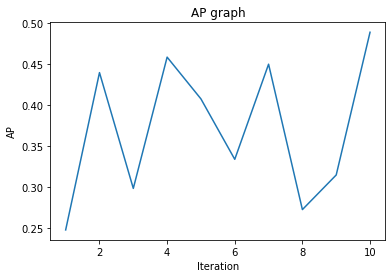

[6828.237546192393, 3382.749869790063, 6322.868288157923, 11264.192329704654, 10310.013664325574, 9616.260334672392, 244.47364321356403, 2057.397044183061, 8414.34306039378, 14024.776530053827]


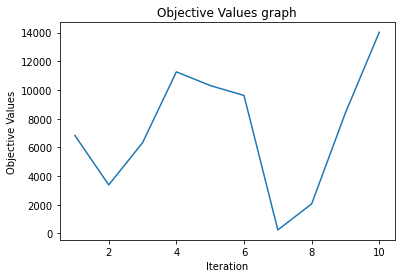

In [22]:
#plots for APS and objective functions
import matplotlib.pyplot as plt
X = np.linspace(1,itr,num=itr)
print(aps)
plt.plot(X, aps)
plt.xlabel("Iteration")
plt.ylabel("AP")
plt.title("AP graph")
plt.show()

print(d_values)
plt.plot(X, d_values)
plt.xlabel("Iteration")
plt.ylabel("Objective Values")
plt.title("Objective Values graph")
plt.show()


In [25]:
generate_result_file(feat_extractor, clf, dataset="test")

100%|██████████| 1629/1629 [28:40<00:00,  1.06s/it]

Results have been saved to result.npy



100%|██████████| 1000/1000 [00:51<00:00, 19.35it/s]


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.59')

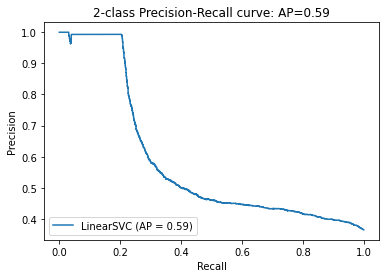

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
D_val, lb_val = get_pos_and_random_neg(feat_extractor,'validation')
y_score = clf.decision_function(D_val)

average_precision = average_precision_score(lb_val, y_score)

disp = plot_precision_recall_curve(clf, D_val, lb_val)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


In [24]:
generate_result_file(feat_extractor, clf, dataset="validation")
ap = compute_mAP(dataset="validation")

  1%|          | 8/1000 [00:00<00:13, 76.05it/s]

Results have been saved to result.npy
Loading annotations and predictions


100%|██████████| 1000/1000 [01:03<00:00, 15.64it/s]


mAP: 0.00014786083193030208
